In [ ]:
!py -m pip install numpy
!py -m pip install matplotlib
!py -m pip install shapely
!py -m pip install tqdm

In [513]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi, atan2, degrees
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from scipy.spatial import ConvexHull, convex_hull_plot_2d

from shapely import affinity, distance, difference
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

from tqdm.notebook import tqdm

Creating polygon

Model 5-3

In [464]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 75.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

In [465]:
opts = []
n = 10000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

In [466]:
# (x - (r+R))^2 + y^2 = R^2
# (x - (r+R))^2 = R^2 - y^2
# (r+R) - x = sqrt(R^2 - y^2)
# x = (r+R) - sqrt(R^2 - y^2)

# ylim = 15.0
# xlim = (r+R) - sqrt(R**2 - ylim**2)

# angle_lim = atan2(ylim, xlim-(R+r))
# if angle_lim <= 0:
#     angle_lim += 2*pi

# delta_angle = 2*(pi - angle_lim)

# disk_pts = []

# for i in range(n):
#     angle = angle_lim + (i/n)*delta_angle
#     disk_pts.append(Point(R*cos(angle), R*sin(angle)))

# disk_plg = Polygon(disk_pts)

disk_pts = []

for i in range(n):
    angle = (i/n)*2*pi
    disk_pts.append(Point(R*cos(angle), R*sin(angle)))

disk_plg = Polygon(disk_pts)
disk_ring = LinearRing(disk_pts)

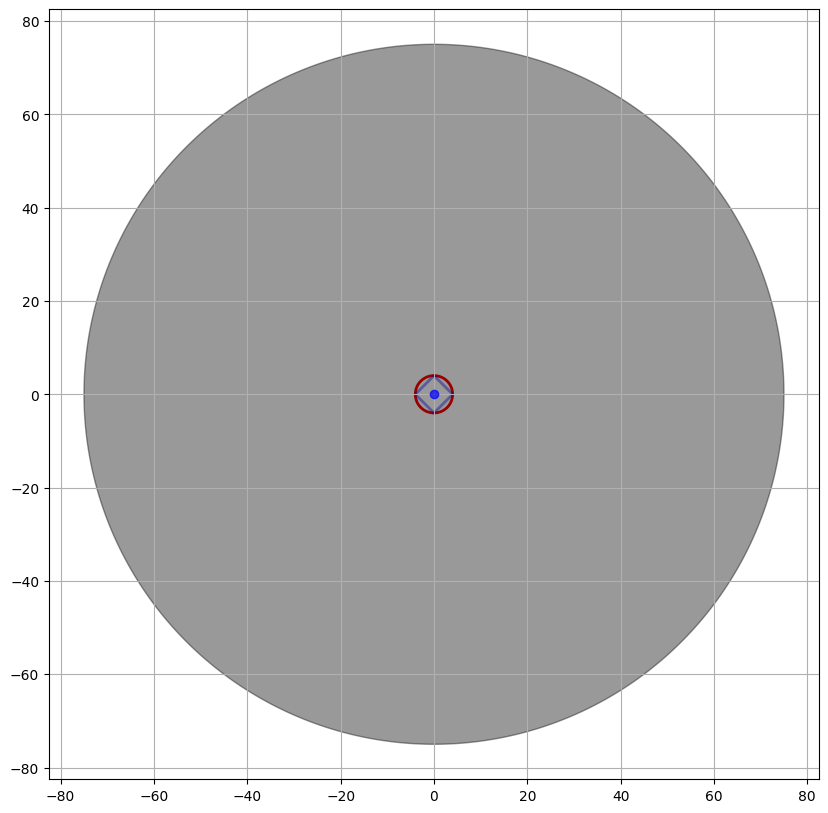

In [467]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
# plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)
plot_polygon(disk_plg, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [468]:
def fangle(t):
    return t*2*pi

In [469]:
n = 10000

cpts = []
cptsy = []
opts = []
optsy = []
aang = []
time = []

maxdst = 0.0
maxi = 0
for i in range(n):
    t = i / n
    phi = fangle(t)
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    cptsy.append(cpt.y)
    opts.append(opt)
    optsy.append(opt.y)
    aang.append(phi)
    time.append(t)

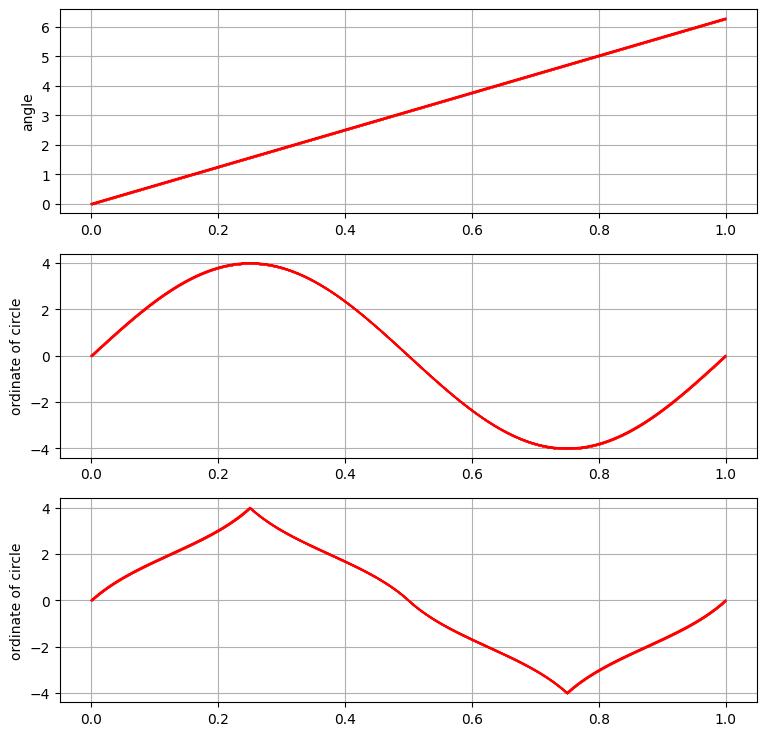

In [470]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(9.0, 9.0)

axs[0].plot(time, aang, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('angle')
axs[0].grid(True)

axs[1].plot(time, optsy, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('ordinate of circle')
axs[1].grid(True)

axs[2].plot(time, cptsy, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('ordinate of circle')
axs[2].grid(True)

In [471]:
plgs = []
ptss = []

lpts = []
ltrcpts = []

for j in range(steps+1):
    if j < steps:
        pt = []
        lpt = []
        ltrcpt = []

        h = delta*(j+1)
        c = 2*sqrt(2*r*h-h**2)
        sn = c/(2*r)
        cs = 1.0-h/r
        ang = atan2(sn, cs)
        if ang < 0:
            ang += 2*pi
        
        ang1 = pi/4.0-ang
        ang2 = pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*0.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 3*pi/4.0-ang
        ang2 = 3*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 5*pi/4.0-ang
        ang2 = 5*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*pi+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*3*pi/2.0
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x+norm.y*R, pt1.y+norm.x*R))
        ltrcpt.append(Point(pt2.x+norm.y*R, pt2.y+norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))

        ang1 = 7*pi/4.0-ang
        ang2 = 7*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*3*pi/2.0+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(int(n/(8*3))):
            alpha = i / int(n/(8*3))
            phi = (1.0-alpha)*ang2+alpha*2*pi
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        lpt.append(pt1)
        lpt.append(pt2)

        ltrcpt.append(Point((r+R)*cos(ang1), (r+R)*sin(ang1)))
        ltrcpt.append(Point(pt1.x-norm.y*R, pt1.y-norm.x*R))
        ltrcpt.append(Point(pt2.x-norm.y*R, pt2.y-norm.x*R))
        ltrcpt.append(Point((r+R)*cos(ang2), (r+R)*sin(ang2)))
        
        lpts.append(lpt)
        ltrcpts.append(ltrcpt)

        ptss.append(pt)
        plgs.append(LinearRing(pt))
    else:
        pt = []
        lpt = []
        ltrcpt = []
        
        for i in range(len(cpts)):
            pt.append(cpts[i])
            
        ptss.append(pt)
        plgs.append(LinearRing(pt))

        lpt.append(Point(r*cos(0.0), r*sin(0.0)))
        lpt.append(Point(r*cos(pi/2.0), r*sin(pi/2.0)))
        lpt.append(Point(r*cos(pi), r*sin(pi)))
        lpt.append(Point(r*cos(3*pi/2.0), r*sin(3*pi/2.0)))
        lpts.append(lpt)

        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)+R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi/2.0)-R/sqrt(2), r*sin(pi/2.0)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)+R/sqrt(2)))
        ltrcpt.append(Point(r*cos(pi)-R/sqrt(2), r*sin(pi)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)-R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(3*pi/2.0)+R/sqrt(2), r*sin(3*pi/2.0)-R/sqrt(2)))
        ltrcpt.append(Point(r*cos(0.0)+R/sqrt(2), r*sin(0.0)-R/sqrt(2)))
        ltrcpts.append(ltrcpt)
    

In [472]:
ltrcangles = []
for i in range(len(ltrcpts)):
    angles = []
    for j in range(len(ltrcpts[i])):
        angle = atan2(ltrcpts[i][j].y, ltrcpts[i][j].x)
        if angle < 0.0:
            angle += 2.0*pi
        angles.append(angle)
    ltrcangles.append(angles)

In [41]:
ltrcangles[2]

[0.14910618002747694,
 1.4216901467674197,
 1.7199025068223734,
 2.992486473562316,
 3.29069883361727,
 4.563282800357213,
 4.861495160412167,
 6.134079127152109]

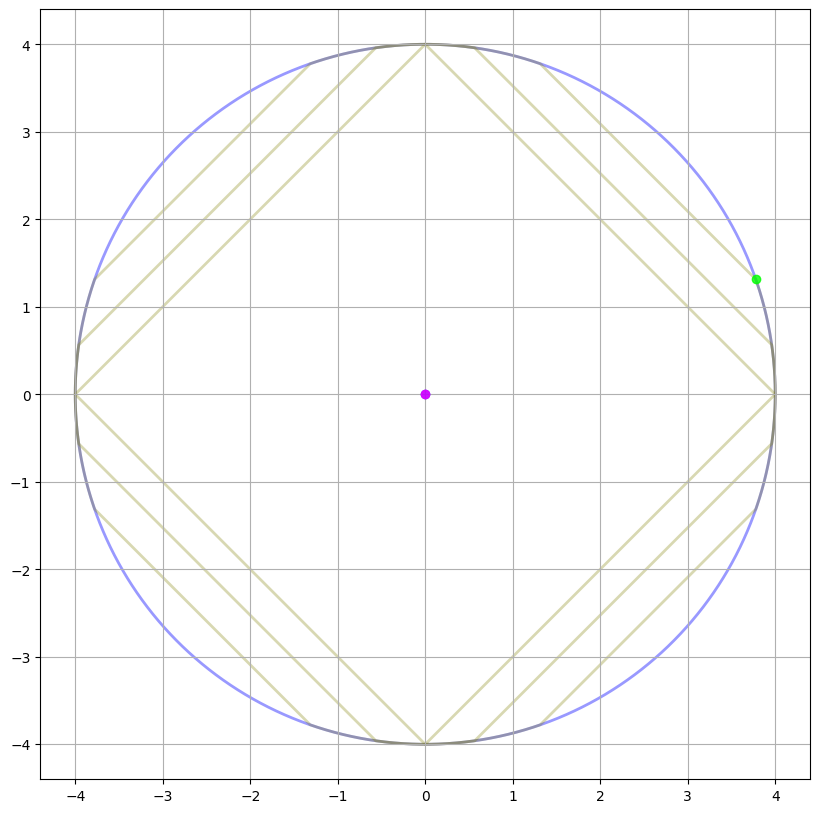

In [473]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0.5,0.5,0), alpha=0.3)

# for j in range(len(lpts)):
#     plot_points(lpts[j], color=(0,1,0), alpha=0.8)

# plot_line(plgs[0], add_points=False, color=(0.5,0.5,0), alpha=0.3)
plot_points(lpts[0][0], color=(0,1,0), alpha=0.8)

plt.show()

In [474]:
trcplgs = []
tangplgs = []

trcptss = []
tangptss = []

for k in range(steps+1):
    if k < steps:
        trcpts = []
        tangpts = []

        for angle in aang:
            
            for i in range(0, 13, 4):
                
                if ltrcangles[k][i] <= angle and angle <= ltrcangles[k][i+1]:
                    # circle
                    ptc = lpts[k][int((i)/2)]
                    anglec = atan2(ptc.y, ptc.x)
                    if anglec < 0.0:
                        anglec += 2.0*pi
                    lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(ptc)

                if ltrcangles[k][i+1] <= angle and angle <= ltrcangles[k][i+2]:
                    # line
                    x1 = ltrcpts[k][i+1].x
                    x2 = ltrcpts[k][i+2].x
                    y1 = ltrcpts[k][i+1].y
                    y2 = ltrcpts[k][i+2].y
                    norm = sqrt((x2-x1)**2+(y2-y1)**2)
                    nn = Point(-R*(y2-y1)/norm, R*(x2-x1)/norm)
                    lr = ((x2-x1)*y1-(y2-y1)*x1)/((x2-x1)*sin(angle)-(y2-y1)*cos(angle))
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(Point(lr*cos(angle)+nn.x, lr*sin(angle)+nn.y))

                if ltrcangles[k][i+2] <= angle and angle <= ltrcangles[k][i+3]:
                    # circle
                    ptc = lpts[k][int((i+3)/2)]
                    anglec = atan2(ptc.y, ptc.x)
                    if anglec < 0.0:
                        anglec += 2.0*pi
                    lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(ptc)
            
                if ltrcangles[k][i+3] <= angle:

                    if i+4 == len(ltrcangles[k]):
                        fin_angle = ltrcangles[k][0]+2*pi
                    else:
                        fin_angle = ltrcangles[k][i+4]

                    if angle <= fin_angle:
                        # circle
                        trcpts.append(Point((r+R)*cos(angle), (r+R)*sin(angle)))
                        tangpts.append(Point((r)*cos(angle), (r)*sin(angle)))
                    
            if angle <= ltrcangles[k][0]:
                # circle
                trcpts.append(Point((r+R)*cos(angle), (r+R)*sin(angle)))
                tangpts.append(Point((r)*cos(angle), (r)*sin(angle)))

        trcplgs.append(LinearRing(trcpts))
        tangplgs.append(LinearRing(tangpts))

        trcptss.append(trcpts)
        tangptss.append(tangpts)
    else:
        trcpts = []
        tangpts = []

        for angle in aang:
        
            for i in range(0, 7, 2):

                if ltrcangles[k][i] <= angle and angle <= ltrcangles[k][i+1]:
                    # line
                    x1 = ltrcpts[k][i].x
                    x2 = ltrcpts[k][i+1].x
                    y1 = ltrcpts[k][i].y
                    y2 = ltrcpts[k][i+1].y
                    norm = sqrt((x2-x1)**2+(y2-y1)**2)
                    nn = Point(-R*(y2-y1)/norm, R*(x2-x1)/norm)
                    lr = ((x2-x1)*y1-(y2-y1)*x1)/((x2-x1)*sin(angle)-(y2-y1)*cos(angle))
                    trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                    tangpts.append(Point(lr*cos(angle)+nn.x, lr*sin(angle)+nn.y))

                if ltrcangles[k][i+1] <= angle:
                    # circle
                    if i+2 == len(ltrcangles[k]):
                        fin_angle = ltrcangles[k][0]+2*pi
                        
                        ptc = lpts[k][0]
                        anglec = atan2(ptc.y, ptc.x)
                        if anglec < 0.0:
                            anglec += 2.0*pi
                        lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                        trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                        tangpts.append(ptc)
                    else:
                        fin_angle = ltrcangles[k][i+2]
                        if angle <= fin_angle:
                            ptc = lpts[k][int((i+3)/2)]
                            anglec = atan2(ptc.y, ptc.x)
                            if anglec < 0.0:
                                anglec += 2.0*pi
                            lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                            trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                            tangpts.append(ptc)

            if angle <= ltrcangles[k][0]:
                ptc = lpts[k][0]
                anglec = atan2(ptc.y, ptc.x)
                if anglec < 0.0:
                    anglec += 2.0*pi
                lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
                trcpts.append(Point(lr*cos(angle), lr*sin(angle)))
                tangpts.append(ptc)

        trcplgs.append(LinearRing(trcpts))
        tangplgs.append(LinearRing(tangpts))

        trcptss.append(trcpts)
        tangptss.append(tangpts)



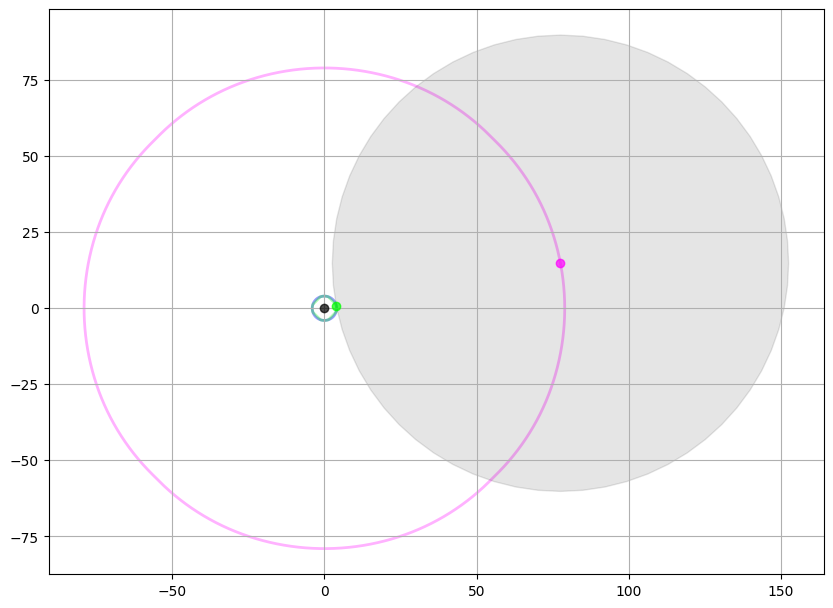

In [475]:
plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

# for j in range(steps+1):
#     plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

# for j in range(steps+1):
#     plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)

plot_line(trcplgs[0], add_points=False, color=(1,0,1), alpha=0.3)
plot_line(tangplgs[0], add_points=False, color=(0,1,0), alpha=0.3)
# plot_points(tangptss[2], color=(0,1,0), markersize=0.08)

k = 300
plot_points(trcptss[0][k], color=(1,0,1), alpha=0.7)
plot_points(tangptss[0][k], color=(0,1,0), alpha=0.7)

circle = trcptss[0][k].buffer(R)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.1)

In [45]:
# i = 0
# for j in range(0, steps+1):
#     for k in range (1, 10000, 75):
#         plot_points(Point(0.0, 0.0), color=(0,1,0), alpha=0.7)
#         plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

#         # for j in range(steps+1):
#         #     plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

#         # for j in range(steps+1):
#         #     plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)

#         plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)
#         # plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)
#         plot_points(tangptss[j], color=(0,1,0), markersize=0.08)

#         plot_points(trcptss[j][k], color=(1,0,1), alpha=0.7)
#         plot_points(tangptss[j][k], color=(0,1,0), alpha=0.7)

#         circle = trcptss[j][k].buffer(R)
#         plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.1)

#         plt.savefig("test/" + str(i) + ".png")
#         plt.close()
#         i += 1

In [476]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
ttime = []
dlttang = []
dltcent = []

for j in range(0, steps+1):
    for i in range(len(time)-2):
        t1 = time[i]
        t2 = time[i+1]
        pttang1 = tangptss[j][i]
        ptcent1 = trcptss[j][i]
        pttang2 = tangptss[j][i+1]
        ptcent2 = trcptss[j][i+1]
        dsttang = sqrt((pttang2.x-pttang1.x)**2+(pttang2.y-pttang1.y)**2)
        dstcent = sqrt((ptcent2.x-ptcent1.x)**2+(ptcent2.y-ptcent1.y)**2)
        dlttang.append(dsttang/(t2-t1))
        dltcent.append(dstcent/(t2-t1))
        ttime.append(time[i]+j)

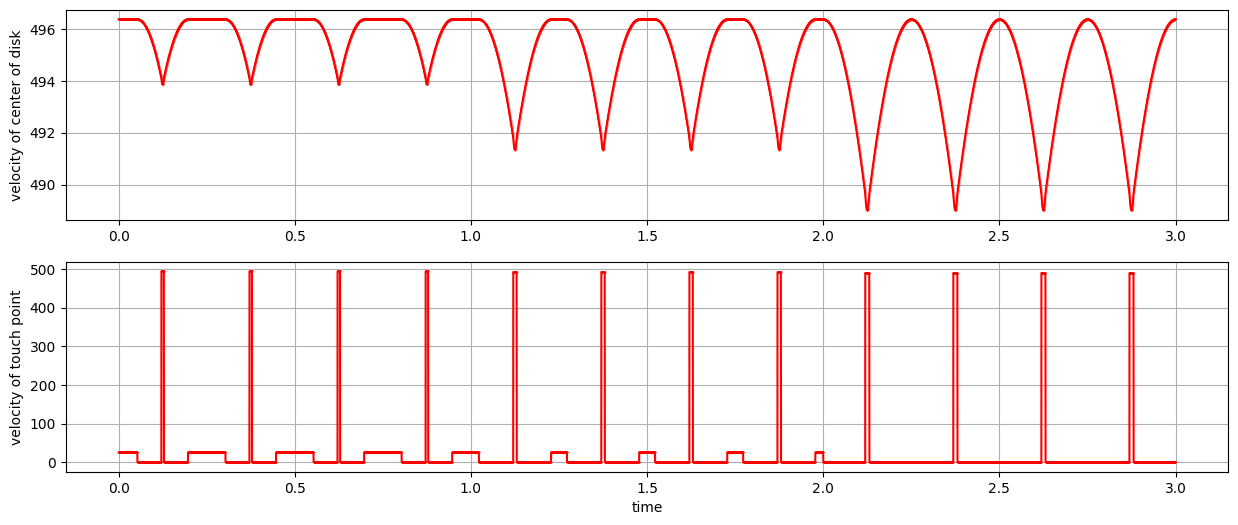

In [477]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15.0, 6.0)

axs[0].plot(ttime, dltcent, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('velocity of center of disk')
axs[0].grid(True)

axs[1].plot(ttime, dlttang, marker='.', color="red", markersize=0.1)
axs[1].set_xlabel('time')
axs[1].set_ylabel('velocity of touch point')
axs[1].grid(True)

In [478]:
stop_nums = [141, 197, 226]
n = 10000

dsts = []
for k in range(steps+1):
    dst = []
    if k < steps:
       for i in range(0, 7, 2):
            dst.append(sqrt((lpts[k][i+1].x-lpts[k][i].x)**2+(lpts[k][i+1].y-lpts[k][i].y)**2))

            if i+2 == len(lpts[k]):
                fin_pt = lpts[k][0]
            else:
                fin_pt = lpts[k][i+2]

            dst.append(sqrt((fin_pt.x-lpts[k][i+1].x)**2+(fin_pt.y-lpts[k][i+1].y)**2))
    else:
        dst.append(sqrt((lpts[k][1].x-lpts[k][0].x)**2+(lpts[k][1].y-lpts[k][0].y)**2))
        dst.append(sqrt((lpts[k][2].x-lpts[k][1].x)**2+(lpts[k][2].y-lpts[k][1].y)**2))
        dst.append(sqrt((lpts[k][3].x-lpts[k][2].x)**2+(lpts[k][3].y-lpts[k][2].y)**2))
        dst.append(sqrt((lpts[k][0].x-lpts[k][3].x)**2+(lpts[k][0].y-lpts[k][3].y)**2))
    dsts.append(dst)

sums = []

for k in range(steps+1):
    sum = 0
    for i in range(len(dsts[k])):
        sum += dsts[k][i]
    sums.append(sum)

for k in range(steps+1):
    for i in range(len(dsts[k])):
        dsts[k][i] *= (n-8*stop_nums[k])/sums[k]

In [479]:
nums = []
for k in range(steps+1):
    num = []
    if k < steps:
        for i in range(0, 13, 4):
            num.append(int(10000*(ltrcangles[k][i+1] - ltrcangles[k][i])/(2*pi)))
            num.append(int(10000*(ltrcangles[k][i+2] - ltrcangles[k][i+1])/(2*pi)))
            num.append(int(10000*(ltrcangles[k][i+3] - ltrcangles[k][i+2])/(2*pi)))
        
            if i+4 == len(ltrcangles[k]):
                fin_angle = ltrcangles[k][0]+2*pi
            else:
                fin_angle = ltrcangles[k][i+4]

            num.append(int(10000*(fin_angle - ltrcangles[k][i+3])/(2*pi)))
    else:
        for i in range(0, 7, 2):
            num.append(int(10000*(ltrcangles[k][i+1] - ltrcangles[k][i])/(2*pi)))

            if i+2 == len(ltrcangles[k]):
                fin_angle = ltrcangles[k][0]+2*pi
            else:
                fin_angle = ltrcangles[k][i+2]
            
            num.append(int(10000*(fin_angle - ltrcangles[k][i+1])/(2*pi)))
    nums.append(num)

In [480]:
vertnums = []

stp = steps+1

for k in range(stp):
    if k < steps:
        vertnum = []

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][0])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][1]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][2])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][3]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][4])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][5]))

        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][6])+1)
        vertnum.append(stop_nums[k])
        vertnum.append(int(dsts[k][7]))

        vertnums.append(vertnum)
    else:
        vertnum = []

        vertnum.append(int(dsts[k][0]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][1]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][2]))
        vertnum.append(2*stop_nums[k])
        vertnum.append(int(dsts[k][3]))
        vertnum.append(2*stop_nums[k])

        vertnums.append(vertnum)

sums = []

for k in range(stp):
    sum = 0
    for i in range(len(vertnums[k])):
        sum += vertnums[k][i]
    sums.append(sum)  

len(vertnums[0])

16

In [481]:
plgs = []
ptss = []

for j in range(steps+1):
    if j < steps:
        pt = []
        opt = []

        h = delta*(j+1)
        c = 2*sqrt(2*r*h-h**2)
        sn = c/(2*r)
        cs = 1.0-h/r
        ang = atan2(sn, cs)
        if ang < 0:
            ang += 2*pi
        
        ang1 = pi/4.0-ang
        ang2 = pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(vertnums[j][0]):
            pt.append(pt1)

        for i in range(vertnums[j][1]):
            alpha = i / vertnums[j][1]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][2]):
            pt.append(pt2)

        ang1 = 3*pi/4.0-ang

        for i in range(vertnums[j][3]):
            alpha = i / vertnums[j][3]
            phi = (1.0-alpha)*ang2+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ang1 = 3*pi/4.0-ang
        ang2 = 3*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(vertnums[j][4]):
            pt.append(pt1)

        for i in range(vertnums[j][5]):
            alpha = i / vertnums[j][5]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][6]):
            pt.append(pt2)

        ang1 = 5*pi/4.0-ang

        for i in range(vertnums[j][7]):
            alpha = i / vertnums[j][7]
            phi = (1.0-alpha)*ang2+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ang1 = 5*pi/4.0-ang
        ang2 = 5*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(vertnums[j][8]):
            pt.append(pt1)

        for i in range(vertnums[j][9]):
            alpha = i / vertnums[j][9]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][10]):
            pt.append(pt2)

        ang1 = 7*pi/4.0-ang

        for i in range(vertnums[j][11]):
            alpha = i / vertnums[j][11]
            phi = (1.0-alpha)*ang2+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ang1 = 7*pi/4.0-ang
        ang2 = 7*pi/4.0+ang
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))
        nrm = sqrt((pt2.y-pt1.y)**2+(pt1.x-pt2.x)**2)
        norm = Point((pt2.y-pt1.y)/nrm, (pt1.x-pt2.x)/nrm)

        for i in range(vertnums[j][12]):
            pt.append(pt1)

        for i in range(vertnums[j][13]):
            alpha = i / vertnums[j][13]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][14]):
            pt.append(pt2)

        ang1 = pi/4.0-ang+2*pi

        for i in range(vertnums[j][15]):
            alpha = i / vertnums[j][15]
            phi = (1.0-alpha)*ang2+alpha*ang1
            x = r*cos(phi)
            y = r*sin(phi)
            pt.append(Point(x, y))

        ptss.append(pt)
        plgs.append(LinearRing(pt))
    else:
        pt = []
        
        ang1 = 0.0
        ang2 = pi/2.0
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))

        for i in range(vertnums[j][0]):
            alpha = i / vertnums[j][0]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][1]):
            pt.append(pt2)

        ang1 = pi/2.0
        ang2 = pi
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))

        for i in range(vertnums[j][2]):
            alpha = i / vertnums[j][2]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][3]):
            pt.append(pt2)

        ang1 = pi
        ang2 = 3*pi/2.0
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))

        for i in range(vertnums[j][4]):
            alpha = i / vertnums[j][4]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][5]):
            pt.append(pt2)

        ang1 = 3*pi/2.0
        ang2 = 2*pi
        pt1 = Point(r*cos(ang1), r*sin(ang1))
        pt2 = Point(r*cos(ang2), r*sin(ang2))

        for i in range(vertnums[j][6]):
            alpha = i / vertnums[j][6]
            x = (1.0-alpha)*pt1.x+alpha*pt2.x
            y = (1.0-alpha)*pt1.y+alpha*pt2.y
            pt.append(Point(x, y))

        for i in range(vertnums[j][7]):
            pt.append(pt2)
            
        ptss.append(pt)
        plgs.append(LinearRing(pt))

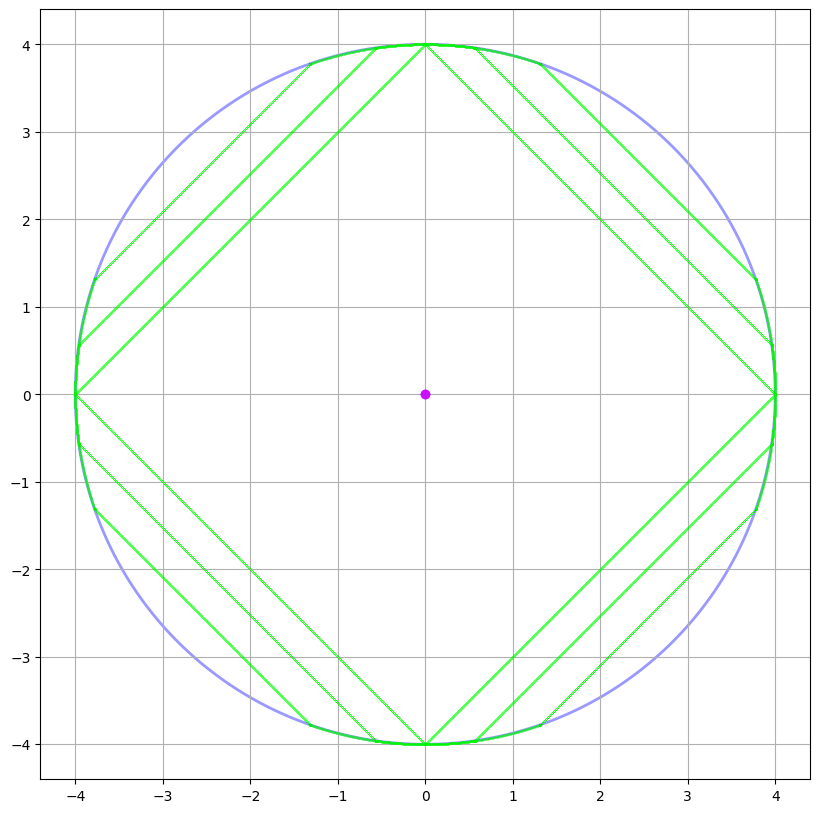

In [482]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
# for j in range(steps+1):
#     plot_line(plgs[j], add_points=False, color=(0.5,0.5,0), alpha=0.3)

for j in range(len(ptss)):
    plot_points(ptss[j], color=(0,1,0), markersize=0.1)

# plot_points(orptss[0], color=(0,1,0), markersize=0.1)

# plot_points(ptss[2], color=(0,1,0), markersize=0.1)

# plot_line(plgs[0], add_points=False, color=(0.5,0.5,0), alpha=0.3)

plt.show()

In [483]:
rtrcptss = []

for k in range(steps+1):
    if k < steps:

        rtrcpts = []

        pt1 = ltrcpts[k][0]
        pt2 = ltrcpts[k][1]
        angle1 = atan2(pt1.y-lpts[k][0].y, pt1.x-lpts[k][0].x)
        angle2 = atan2(pt2.y-lpts[k][0].y, pt2.x-lpts[k][0].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][0]): 
            alpha = j / vertnums[k][0]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][0].x
            y = R*sin(phi)+lpts[k][0].y
            rtrcpts.append(Point(x, y))


        pt1 = ltrcpts[k][1]
        pt2 = ltrcpts[k][2]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        # line
        for j in range(vertnums[k][0], vertnums[k][0]+vertnums[k][1]):
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        pt1 = ltrcpts[k][2]
        pt2 = ltrcpts[k][3]
        angle1 = atan2(pt1.y-lpts[k][1].y, pt1.x-lpts[k][1].x)
        angle2 = atan2(pt2.y-lpts[k][1].y, pt2.x-lpts[k][1].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][2]):
            alpha = j / vertnums[k][2]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][1].x
            y = R*sin(phi)+lpts[k][1].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][3]
        pt2 = ltrcpts[k][4]
        angle1 = atan2(pt1.y, pt1.x)
        angle2 = atan2(pt2.y, pt2.x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][3]):
            alpha = j / vertnums[k][3]
            phi = (1-alpha)*angle1+alpha*angle2
            x = (r+R)*cos(phi)
            y = (r+R)*sin(phi)
            rtrcpts.append(Point(x, y))

        # ============================================
        # ============================================
        # ============================================

        pt1 = ltrcpts[k][4]
        pt2 = ltrcpts[k][5]
        angle1 = atan2(pt1.y-lpts[k][2].y, pt1.x-lpts[k][2].x)
        angle2 = atan2(pt2.y-lpts[k][2].y, pt2.x-lpts[k][2].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][4]): 
            alpha = j / vertnums[k][4]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][2].x
            y = R*sin(phi)+lpts[k][2].y
            rtrcpts.append(Point(x, y))


        pt1 = ltrcpts[k][5]
        pt2 = ltrcpts[k][6]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum = vertnums[k][0]+vertnums[k][1]+vertnums[k][2]+vertnums[k][3]+vertnums[k][4]

        # line
        for j in range(sum, sum+vertnums[k][5]):
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        pt1 = ltrcpts[k][6]
        pt2 = ltrcpts[k][7]
        angle1 = atan2(pt1.y-lpts[k][3].y, pt1.x-lpts[k][3].x)
        angle2 = atan2(pt2.y-lpts[k][3].y, pt2.x-lpts[k][3].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][6]):
            alpha = j / vertnums[k][6]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][3].x
            y = R*sin(phi)+lpts[k][3].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][7]
        pt2 = ltrcpts[k][8]
        angle1 = atan2(pt1.y, pt1.x)
        angle2 = atan2(pt2.y, pt2.x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][7]):
            alpha = j / vertnums[k][7]
            phi = (1-alpha)*angle1+alpha*angle2
            x = (r+R)*cos(phi)
            y = (r+R)*sin(phi)
            rtrcpts.append(Point(x, y))

        # # ============================================
        # # ============================================
        # # ============================================

        pt1 = ltrcpts[k][8]
        pt2 = ltrcpts[k][9]
        angle1 = atan2(pt1.y-lpts[k][4].y, pt1.x-lpts[k][4].x)
        angle2 = atan2(pt2.y-lpts[k][4].y, pt2.x-lpts[k][4].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][8]): 
            alpha = j / vertnums[k][8]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][4].x
            y = R*sin(phi)+lpts[k][4].y
            rtrcpts.append(Point(x, y))


        pt1 = ltrcpts[k][9]
        pt2 = ltrcpts[k][10]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum += vertnums[k][5]+vertnums[k][6]+vertnums[k][7]+vertnums[k][8]

        # line
        for j in range(sum, sum+vertnums[k][9]):
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        pt1 = ltrcpts[k][10]
        pt2 = ltrcpts[k][11]
        angle1 = atan2(pt1.y-lpts[k][5].y, pt1.x-lpts[k][5].x)
        angle2 = atan2(pt2.y-lpts[k][5].y, pt2.x-lpts[k][5].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][10]):
            alpha = j / vertnums[k][10]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][5].x
            y = R*sin(phi)+lpts[k][5].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][11]
        pt2 = ltrcpts[k][12]
        angle1 = atan2(pt1.y, pt1.x)
        angle2 = atan2(pt2.y, pt2.x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][11]):
            alpha = j / vertnums[k][11]
            phi = (1-alpha)*angle1+alpha*angle2
            x = (r+R)*cos(phi)
            y = (r+R)*sin(phi)
            rtrcpts.append(Point(x, y))

        # ============================================
        # ============================================
        # ============================================

        pt1 = ltrcpts[k][12]
        pt2 = ltrcpts[k][13]
        angle1 = atan2(pt1.y-lpts[k][6].y, pt1.x-lpts[k][6].x)
        angle2 = atan2(pt2.y-lpts[k][6].y, pt2.x-lpts[k][6].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][12]): 
            alpha = j / vertnums[k][12]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][6].x
            y = R*sin(phi)+lpts[k][6].y
            rtrcpts.append(Point(x, y))


        pt1 = ltrcpts[k][13]
        pt2 = ltrcpts[k][14]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum += vertnums[k][9]+vertnums[k][10]+vertnums[k][10]+vertnums[k][11]

        # line
        for j in range(sum, sum+vertnums[k][13]):
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        pt1 = ltrcpts[k][14]
        pt2 = ltrcpts[k][15]
        angle1 = atan2(pt1.y-lpts[k][7].y, pt1.x-lpts[k][7].x)
        angle2 = atan2(pt2.y-lpts[k][7].y, pt2.x-lpts[k][7].x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi

        # circle
        for j in range(vertnums[k][14]):
            alpha = j / vertnums[k][14]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*cos(phi)+lpts[k][7].x
            y = R*sin(phi)+lpts[k][7].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][15]
        pt2 = ltrcpts[k][0]
        angle1 = atan2(pt1.y, pt1.x)
        angle2 = atan2(pt2.y, pt2.x)
        if angle1 < 0.0:
            angle1 += 2.0*pi
        if angle2 < 0.0:
            angle2 += 2.0*pi
        
        angle2 += 2*pi

        # circle
        for j in range(vertnums[k][15]):
            alpha = j / vertnums[k][15]
            phi = (1-alpha)*angle1+alpha*angle2
            x = (r+R)*cos(phi)
            y = (r+R)*sin(phi)
            rtrcpts.append(Point(x, y))

        rtrcptss.append(rtrcpts)

    else:
        rtrcpts = []
            
        pt1 = ltrcpts[k][0]
        pt2 = ltrcpts[k][1]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        # line
        for j in range(vertnums[k][0]): 
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        # circle
        pt1 = ltrcpts[k][1]
        pt2 = ltrcpts[k][2]
        angle1 = math.atan2(pt1.y-lpts[k][1].y, pt1.x-lpts[k][1].x)
        angle2 = math.atan2(pt2.y-lpts[k][1].y, pt2.x-lpts[k][1].x)
        if angle1 < 0.0:
            angle1 += 2.0*math.pi
        if angle2 < 0.0:
            angle2 += 2.0*math.pi
        
        for j in range(vertnums[k][1]): 
            alpha = j / vertnums[k][1]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*math.cos(phi)+lpts[k][1].x
            y = R*math.sin(phi)+lpts[k][1].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][2]
        pt2 = ltrcpts[k][3]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum = vertnums[k][0]+vertnums[k][1]

        # line
        for j in range(sum, sum+vertnums[k][2]): 
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        # circle
        pt1 = ltrcpts[k][3]
        pt2 = ltrcpts[k][4]
        angle1 = math.atan2(pt1.y-lpts[k][2].y, pt1.x-lpts[k][2].x)
        angle2 = math.atan2(pt2.y-lpts[k][2].y, pt2.x-lpts[k][2].x)
        if angle1 < 0.0:
            angle1 += 2.0*math.pi
        if angle2 < 0.0:
            angle2 += 2.0*math.pi
        
        for j in range(vertnums[k][3]): 
            alpha = j / vertnums[k][3]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*math.cos(phi)+lpts[k][2].x
            y = R*math.sin(phi)+lpts[k][2].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][4]
        pt2 = ltrcpts[k][5]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum += vertnums[k][2]+vertnums[k][3]

        # line
        for j in range(sum, sum+vertnums[k][4]): 
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        # circle
        pt1 = ltrcpts[k][5]
        pt2 = ltrcpts[k][6]
        angle1 = math.atan2(pt1.y-lpts[k][3].y, pt1.x-lpts[k][3].x)
        angle2 = math.atan2(pt2.y-lpts[k][3].y, pt2.x-lpts[k][3].x)
        if angle1 < 0.0:
            angle1 += 2.0*math.pi
        if angle2 < 0.0:
            angle2 += 2.0*math.pi
        
        for j in range(vertnums[k][5]): 
            alpha = j / vertnums[k][5]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*math.cos(phi)+lpts[k][3].x
            y = R*math.sin(phi)+lpts[k][3].y
            rtrcpts.append(Point(x, y))

        pt1 = ltrcpts[k][6]
        pt2 = ltrcpts[k][7]
        nr = sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2)
        nv = Point(R*(pt2.y-pt1.y)/nr, -R*(pt2.x-pt1.x)/nr)

        sum += vertnums[k][4]+vertnums[k][5]

        # line
        for j in range(sum, sum+vertnums[k][6]): 
            rtrcpts.append(Point(ptss[k][j].x+nv.x, ptss[k][j].y+nv.y))

        # circle
        pt1 = ltrcpts[k][7]
        pt2 = ltrcpts[k][0]
        angle1 = math.atan2(pt1.y-lpts[k][0].y, pt1.x-lpts[k][0].x)
        angle2 = math.atan2(pt2.y-lpts[k][0].y, pt2.x-lpts[k][0].x)
        if angle1 < 0.0:
            angle1 += 2.0*math.pi
        if angle2 < 0.0:
            angle2 += 2.0*math.pi
        
        angle2 += 2*pi
        
        for j in range(vertnums[k][7]): 
            alpha = j / vertnums[k][7]
            phi = (1-alpha)*angle1+alpha*angle2
            x = R*math.cos(phi)+lpts[k][0].x
            y = R*math.sin(phi)+lpts[k][0].y
            rtrcpts.append(Point(x, y))

        rtrcptss.append(rtrcpts)

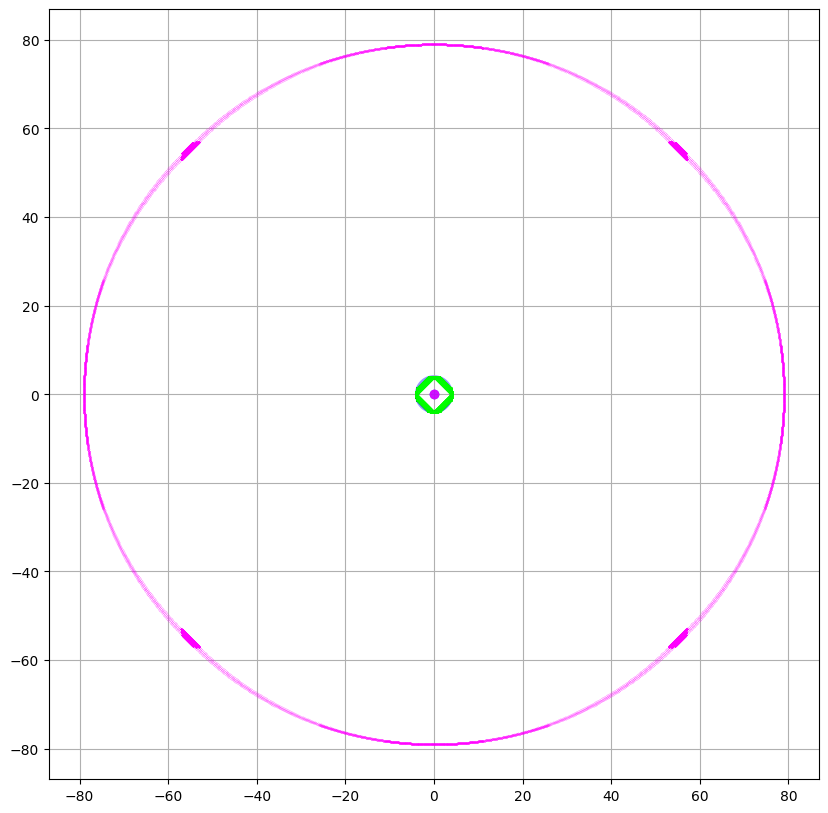

In [484]:
# plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
# for j in range(steps+1):
#     plot_line(plgs[j], add_points=False, color=(0.5,0.5,0), alpha=0.3)

for j in range(len(ptss)):
    plot_points(ptss[j], color=(0,1,0), markersize=0.1)

for j in range(len(ptss)):
    plot_points(rtrcptss[j], color=(1,0,1), markersize=0.1)

# plot_points(ptss[0], color=(0,1,0), markersize=0.1)
# plot_points(rtrcptss[0], color=(1,0,1), markersize=0.1)

# plot_line(plgs[0], add_points=False, color=(0.5,0.5,0), alpha=0.3)

plt.rcParams["figure.figsize"] = (6.0,6.0)
plt.show()

In [485]:
# oopts = []

# for i in range(n):
#     oopts.append([opts[i].x, opts[i].y])

# real_trace = []
# for i in tqdm(range(n)):
#     npts = oplg.intersection(transform(lambda x, y, z=None: (x+trcptss[0][i].x, y+trcptss[0][i].y), disk_plg))

#     oopts = []

#     if len(npts.coords) != 0:
#         angle1 = atan2(npts.coords[0][1], npts.coords[0][0])
#         angle2 = atan2(npts.coords[-1][1], npts.coords[-1][0])
#         if angle1 <= 0:
#             angle1 += 2*pi
#         if angle2 <= 0:
#             angle2 += 2*pi

#         for l in (range(n)):
#             pt = opts[l]
#             init_angle = atan2(pt.y, pt.x)
#             if (angle1 <= init_angle and init_angle <= angle2):
#                 line = LineString( [ (0,0), ((r+R/10)*cos(init_angle), (r+R/10)*sin(init_angle)) ] )
#                 disk = transform(lambda x, y, z=None: (x+trcptss[0][i].x, y+trcptss[0][i].y), disk_plg)
#                 pt = disk.intersection(line)
#                 oopts.append(Point(pt.coords[0][0], pt.coords[0][1]))
#             else:
#                 oopts.append(Point(r*cos(init_angle), r*sin(init_angle)))

#     else:
#         for l in range(n):
#             pt = opts[l]
#             init_angle = atan2(pt.y, pt.x)
#             oopts.append(Point(r*cos(init_angle), r*sin(init_angle)))
#     real_trace.append(oopts)


In [486]:
# j = 0
# k = 1400

# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
# # plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

# plot_points(ptss[j], color=(0,1,0), markersize=0.1)
# plot_points(real_trace[k], color=(0,0,1), markersize=1)
# plot_points(rtrcptss[j], color=(1,0,1), markersize=0.1)

# # plot_polygon(transform(lambda x, y, z=None: (x+trcptss[j][k].x, y+trcptss[j][k].y), disk_plg), add_points=False, color=(0,0,0), alpha=0.4)
# # plot_polygon(disk_plg, add_points=False, color=(0,0,0), alpha=0.4)

# plt.rcParams["figure.figsize"] = (6.0,6.0)
# # plt.xlim(2, 6)
# # plt.ylim(0, 4)
# plt.show()

In [227]:
# i = 0
# j = 0
# for k in tqdm(range(0, 10000, 20)):
#     plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
#     plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
#     # plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

#     plot_points(ptss[j], color=(0,1,0), markersize=0.1)
#     plot_points(real_trace[k], color=(0,0,1), markersize=1)
#     plot_points(rtrcptss[j], color=(1,0,1), markersize=0.1)

#     plt.rcParams["figure.figsize"] = (6.0,6.0)
#     plt.savefig("cut/" + str(i) + ".png")
#     plt.close()
#     i += 1

  0%|          | 0/500 [00:00<?, ?it/s]

In [487]:
orptss = []

orpts = []
for i in tqdm(range(n)):
    norm = sqrt(ptss[0][i].x**2+ptss[0][i].y**2)
    orpts.append(Point(r*ptss[0][i].x/norm, r*ptss[0][i].y/norm))
orptss.append(orpts)

oplgs = [LinearRing(orptss[0]), LinearRing(ptss[0]), LinearRing(ptss[1]), LinearRing(ptss[2])]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [488]:
orpts = []
for i in tqdm(range(n)):
    line = LineString([(0.0, 0.0), (5*ptss[1][i].x, 5*ptss[1][i].y)])
    pt = oplgs[1].intersection(line)
    orpts.append(pt)
orptss.append(orpts)

orpts = []
for i in tqdm(range(n)):
    line = LineString([(0.0, 0.0), (5*ptss[2][i].x, 5*ptss[2][i].y)])
    pt = oplgs[2].intersection(line)
    orpts.append(pt)
orptss.append(orpts)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [489]:
orig_pts = [orptss[0], orptss[1], orptss[2]]

orig_angles = []
for j in range(len(orig_pts)):
    cur_angles = []
    for i in range(n):
        angle_cur = atan2(orig_pts[j][i].y, orig_pts[j][i].x)
        if angle_cur <= 0:
            angle_cur += 2*pi
        cur_angles.append(angle_cur)
    orig_angles.append(cur_angles)

orig_angles[2][0] = 0.0

In [490]:
def GetTrace(j, k, trace):
    disk = transform(lambda x, y, z=None: (x+rtrcptss[j][k].x, y+rtrcptss[j][k].y), disk_plg)
    disk_edge = transform(lambda x, y, z=None: (x+rtrcptss[j][k].x, y+rtrcptss[j][k].y), disk_ring)

    angle_tan = atan2(ptss[j][k].y, ptss[j][k].x)
    if angle_tan <= 0:
        angle_tan += 2*pi

    npts = oplgs[j].intersection(disk)

    anglec = atan2(rtrcptss[j][k].y, rtrcptss[j][k].x)
    if anglec <= 0:
        anglec += 2*pi
    rc = sqrt(rtrcptss[j][k].x**2+rtrcptss[j][k].y**2)

    if npts.geom_type == 'LineString':
        if len(npts.coords) != 0:
            angle_edge = atan2(npts.coords[-1][1], npts.coords[-1][0])
            if angle_edge <= 0:
                angle_edge += 2*pi

            for i in range(n):
                if orig_angles[j][i] >= angle_edge:
                    i_intersect = i
                    break

            for i in (range(n)):
                if i < k:
                    trace.append(ptss[j][i])
                elif k <= i and i <= i_intersect:
                    angle_cur = atan2(orig_pts[j][i].y, orig_pts[j][i].x)
                    if angle_cur <= 0:
                        angle_cur += 2*pi

                    if angle_cur > angle_edge:
                        angle_cur -= 1e-3
                    
                    lr = rc*cos(angle_cur-anglec)-sqrt(R**2-(rc*sin(angle_cur-anglec))**2)
                    trace.append(Point(lr*cos(angle_cur), lr*sin(angle_cur)))
                else:
                    trace.append(orig_pts[j][i])
        else:
            for i in (range(n)):
                if i < k:
                    trace.append(ptss[j][i])
                else:
                    trace.append(orig_pts[j][i])
    else:
        if len(npts.geoms[0].coords) != 0:
            angle_edge = atan2(npts.geoms[0].coords[-1][1], npts.geoms[0].coords[-1][0])
            if angle_edge <= 0:
                angle_edge += 2*pi

            for i in range(n):
                if orig_angles[j][i] >= angle_edge:
                    i_intersect = i
                    break

            for i in (range(n)):
                if i < k:
                    trace.append(ptss[j][i])
                elif k <= i and i <= i_intersect:
                    angle_cur = atan2(orig_pts[j][i].y, orig_pts[j][i].x)
                    if angle_cur <= 0:
                        angle_cur += 2*pi

                    if angle_cur > angle_edge:
                        angle_cur -= 1e-3
                        
                    lr = rc*cos(angle_cur-anglec)-sqrt(R**2-(rc*sin(angle_cur-anglec))**2)
                    trace.append(Point(lr*cos(angle_cur), lr*sin(angle_cur)))
                else:
                    trace.append(orig_pts[j][i])
        else:
            for i in (range(n)):
                if i < k:
                    trace.append(ptss[j][i])
                else:
                    trace.append(orig_pts[j][i])

49.40223507943184


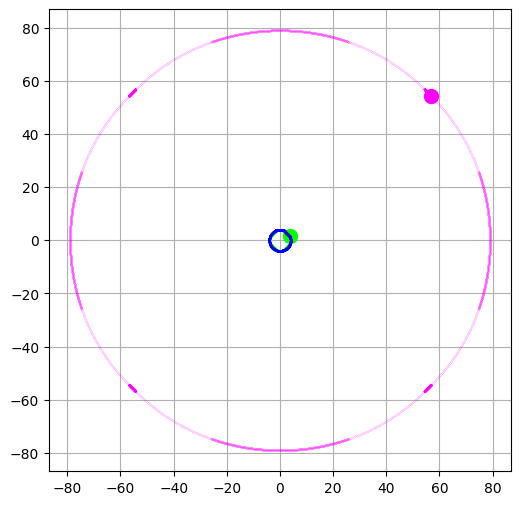

In [496]:
j = 0
k = 200

trace = []

GetTrace(j, k, trace)

# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)

plot_points(ptss[j], color=(0,1,0), markersize=0.05)
plot_points(rtrcptss[j], color=(1,0,1), markersize=0.05)

# plot_points(orig_pts[j][k], color=(0,0,0), markersize=20)
plot_points(ptss[j][k], color=(0,1,0), markersize=10)
plot_points(rtrcptss[j][k], color=(1,0,1), markersize=10)
if npts.geom_type == 'LineString':
    if (len(npts.coords) != 0):
        plot_points(Point(npts.coords[-1][0], npts.coords[-1][1]), color=(0,0,1), markersize=10)
else:
    if (len(npts.geoms[0].coords) != 0):
        plot_points(Point(npts.geoms[0].coords[-1][0], npts.geoms[0].coords[-1][1]), color=(0,0,1), markersize=10)

plot_points(trace, color=(0,0,1), markersize=0.1)

plot_polygon(disk, add_points=False, color=(0,0,0), alpha=0.4)

plt.rcParams["figure.figsize"] = (6.0,6.0)
# plt.xlim(2, 6)
# plt.ylim(-1, 3)
# plt.xlim(-3, 1)
# plt.ylim(-6, -2)
plt.show()

In [455]:
l = 0
for j in range(1, 2):
    for k in tqdm(range(0, 10000, 75)):
        trace = []

        disk = transform(lambda x, y, z=None: (x+rtrcptss[j][k].x, y+rtrcptss[j][k].y), disk_plg)
        disk_edge = transform(lambda x, y, z=None: (x+rtrcptss[j][k].x, y+rtrcptss[j][k].y), disk_ring)

        angle_tan = atan2(ptss[j][k].y, ptss[j][k].x)
        if angle_tan <= 0:
            angle_tan += 2*pi

        npts = oplgs[j].intersection(disk)

        anglec = atan2(rtrcptss[j][k].y, rtrcptss[j][k].x)
        if anglec <= 0:
            anglec += 2*pi
        rc = sqrt(rtrcptss[j][k].x**2+rtrcptss[j][k].y**2)

        if npts.geom_type == 'LineString':
            if len(npts.coords) != 0:
                angle_edge = atan2(npts.coords[-1][1], npts.coords[-1][0])
                if angle_edge <= 0:
                    angle_edge += 2*pi

                for i in range(n):
                    if orig_angles[j][i] >= angle_edge:
                        i_intersect = i
                        break

                for i in (range(n)):
                    if i < k:
                        trace.append(ptss[j][i])
                    elif k <= i and i <= i_intersect:
                        angle_cur = atan2(orig_pts[j][i].y, orig_pts[j][i].x)
                        if angle_cur <= 0:
                            angle_cur += 2*pi

                        if angle_cur > angle_edge:
                            angle_cur -= 1e-3
                        
                        lr = rc*cos(angle_cur-anglec)-sqrt(R**2-(rc*sin(angle_cur-anglec))**2)
                        trace.append(Point(lr*cos(angle_cur), lr*sin(angle_cur)))
                    else:
                        trace.append(orig_pts[j][i])
            else:
                for i in (range(n)):
                    if i < k:
                        trace.append(ptss[j][i])
                    else:
                        trace.append(orig_pts[j][i])
        else:
            if len(npts.geoms[0].coords) != 0:
                angle_edge = atan2(npts.geoms[0].coords[-1][1], npts.geoms[0].coords[-1][0])
                if angle_edge <= 0:
                    angle_edge += 2*pi

                for i in range(n):
                    if orig_angles[j][i] >= angle_edge:
                        i_intersect = i
                        break

                for i in (range(n)):
                    if i < k:
                        trace.append(ptss[j][i])
                    elif k <= i and i <= i_intersect:
                        angle_cur = atan2(orig_pts[j][i].y, orig_pts[j][i].x)
                        if angle_cur <= 0:
                            angle_cur += 2*pi

                        if angle_cur > angle_edge:
                            angle_cur -= 1e-3
                        
                        lr = rc*cos(angle_cur-anglec)-sqrt(R**2-(rc*sin(angle_cur-anglec))**2)
                        trace.append(Point(lr*cos(angle_cur), lr*sin(angle_cur)))
                    else:
                        trace.append(orig_pts[j][i])
            else:
                for i in (range(n)):
                    if i < k:
                        trace.append(ptss[j][i])
                    else:
                        trace.append(orig_pts[j][i])

        # plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
        # plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)

        plot_points(ptss[j], color=(0,1,0), markersize=0.05)
        plot_points(rtrcptss[j], color=(1,0,1), markersize=0.05)

        # plot_points(orig_pts[j][k], color=(0,0,0), markersize=20)
        plot_points(ptss[j][k], color=(0,1,0), markersize=10)
        plot_points(rtrcptss[j][k], color=(1,0,1), markersize=10)
        if npts.geom_type == 'LineString':
            if (len(npts.coords) != 0):
                plot_points(Point(npts.coords[-1][0], npts.coords[-1][1]), color=(0,0,1), markersize=10)
        else:
            if (len(npts.geoms[0].coords) != 0):
                plot_points(Point(npts.geoms[0].coords[-1][0], npts.geoms[0].coords[-1][1]), color=(0,0,1), markersize=10)


        plot_points(trace, color=(0,0,1), markersize=0.1)

        plot_polygon(disk, add_points=False, color=(0,0,0), alpha=0.4)

        plt.rcParams["figure.figsize"] = (6.0,6.0)
        plt.xlim(-6.5, 6.5)
        plt.ylim(-6.5, 6.5)
        # plt.show()

        # plt.rcParams["figure.figsize"] = (10.0,10.0)
        # plt.xlim(-15, 8)
        # plt.ylim(-8, 8)
        # plt.legend()
        plt.savefig("cut/" + str(l) + ".png")
        plt.close()
        l += 1

  0%|          | 0/134 [00:00<?, ?it/s]

In [491]:
rangles = []
for j in range(0, steps+1):
    # angles = []
    for i in range(len(rtrcptss[j])):
        pt = rtrcptss[j][i]
        angle = atan2(pt.y, pt.x)
        if angle < 0.0:
            angle += 2.0*pi
        if len(rangles) != 0:
            if abs(angle-rangles[-1]) > pi:
                angle += 2*pi
        rangles.append(angle)
    # rangles.append()

In [507]:
j = 0
i = 1000

trace = []
GetTrace(j, i, trace)
cur_area = LinearRing(trace).area
print(cur_area)
# print(whole_area-cur_area)

0.0


In [523]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
ttime = []
dlttang = []
dltcent = []
rangles = []
area = []
n = 10000

whole_area = Polygon(orptss[0]).area

for j in range(0, steps+1):
    for i in tqdm(range(len(time)-2)):
        t1 = time[i]
        t2 = time[i+1]
        pttang1 = ptss[j][i]
        ptcent1 = rtrcptss[j][i]
        pttang2 = ptss[j][i+1]
        ptcent2 = rtrcptss[j][i+1]
        dsttang = sqrt((pttang2.x-pttang1.x)**2+(pttang2.y-pttang1.y)**2)
        dstcent = sqrt((ptcent2.x-ptcent1.x)**2+(ptcent2.y-ptcent1.y)**2)
        angle = atan2(ptcent1.y, ptcent1.x)
        if angle < 0.0:
            angle += 2.0*pi
        trace = []
        GetTrace(j, i, trace)
        # array_trace = []
        # for k in range(n):
        #     array_trace.append([trace[k].x, trace[k].y])

        # trace_hull_ind = ConvexHull(array_trace)
        # trace_hull = []
        # for k in range(len(trace_hull_ind.vertices)):
        #     trace_hull.append(Point(array_trace[trace_hull_ind.vertices[k]][0], array_trace[trace_hull_ind.vertices[k]][1]))

        cur_area = Polygon(trace).area

        area.append(whole_area-cur_area)
        dlttang.append(dsttang/(t2-t1))
        dltcent.append(dstcent/(t2-t1))
        ttime.append(time[i]+j)
        rangles.append(angle+j*2*pi)

  0%|          | 0/9998 [00:00<?, ?it/s]

  0%|          | 0/9998 [00:00<?, ?it/s]

  0%|          | 0/9998 [00:00<?, ?it/s]

In [ ]:
with open('volume.txt', 'w') as f:
    for item in area:
        f.write(str(item) + '\n')

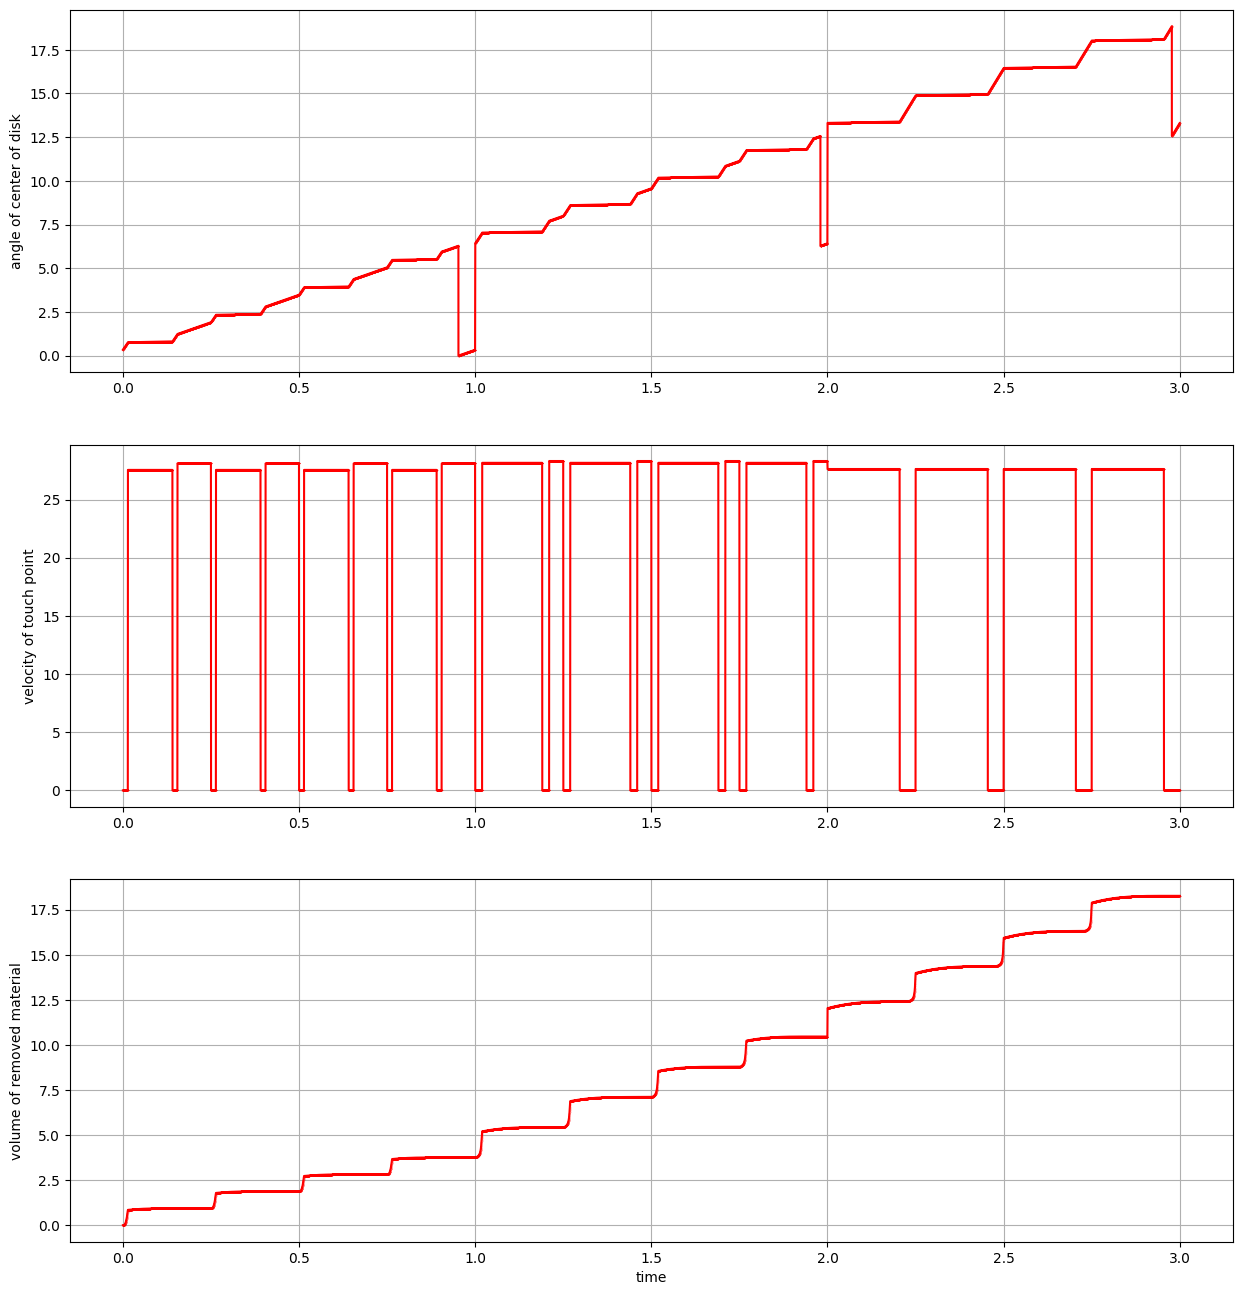

In [524]:
fig, axs = plt.subplots(3, 1)
fig.set_size_inches(15.0, 16.0)

axs[0].plot(ttime, rangles, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('angle of center of disk')
axs[0].grid(True)

axs[1].plot(ttime, dlttang, marker='.', linestyle="-", color="red", markersize=0.1)
axs[1].set_ylabel('velocity of touch point')
axs[1].grid(True)

axs[2].plot(ttime, area, marker='.', linestyle="-", color="red", markersize=0.1)
axs[2].set_xlabel('time')
axs[2].set_ylabel('volume of removed material')
axs[2].grid(True)

In [28]:
# for j in range(0, steps+1):
#     i = 0
#     for k in range (1, 10000, 75):
#         plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7)
#         plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)

#         # for j in range(steps+1):
#         #     plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

#         # for j in range(steps+1):
#         #     plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)

#         plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)
#         # plot_line(tangplgs[j], add_points=False, color=(0,1,0), alpha=0.3)
#         plot_points(tangptss[j], color=(0,1,0), markersize=0.08)

#         plot_points(rtrcptss[j][k], color=(1,0,1), alpha=0.7)
#         plot_points(ptss[j][k], color=(0,1,0), alpha=0.7)

#         circle = rtrcptss[j][k].buffer(R)
#         plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.1)

#         plt.savefig("uniform/" + str(j) + "/" + str(i) + ".png")
#         plt.close()
#         i += 1

In [29]:
# ptss[j][k]
# plt.rcParams["figure.figsize"] = (6.0,6.0)

In [494]:
n = 10000

i = 0
for j in range(0, steps+1):
    for k in tqdm(range(0, n, 75)):
        angle = atan2(rtrcptss[j][k].y, rtrcptss[j][k].x)
        if angle <= 2*pi:
            angle += 2*pi

        xstep = (k/n+j)*delta*6
        xval = r+R-affinity.rotate(rtrcptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True).x-xstep
        trace = []
        GetTrace(j, k, trace)

        plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7, label="absolute center")
        plot_points(Point(xval, 0.0), color=(1,0,0), alpha=0.7, label="diamond center")
        # plot_points(Point(r+R, 0.0), color=(1,0,0), alpha=0.7)
        plot_line(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(LinearRing(trace), -angle, origin=Point(0.0,0.0), use_radians=True)), 
                add_points=False, color=(0,0,1), alpha=0.4, label="rough diamond")
        plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(tangplgs[j], -angle, origin=Point(0.0,0.0), use_radians=True)), 
                    color=(0,1,0), markersize=0.5, label="bruting trace")
        plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(ptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True)), 
                    color=(1,0,1), alpha=0.7, label="touch point")
        plot_polygon(transform(lambda x, y, z=None: (x+(R+r-xstep), y), disk_plg), 
                    add_points=False, color=(0,0,0), alpha=0.4, label="bruting disk")

        plt.rcParams["figure.figsize"] = (10.0,10.0)
        plt.xlim(-15, 8)
        plt.ylim(-8, 8)
        plt.legend()
        plt.savefig("test_orig/" + str(i) + ".png")
        plt.close()
        i += 1

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

46.507022657313435


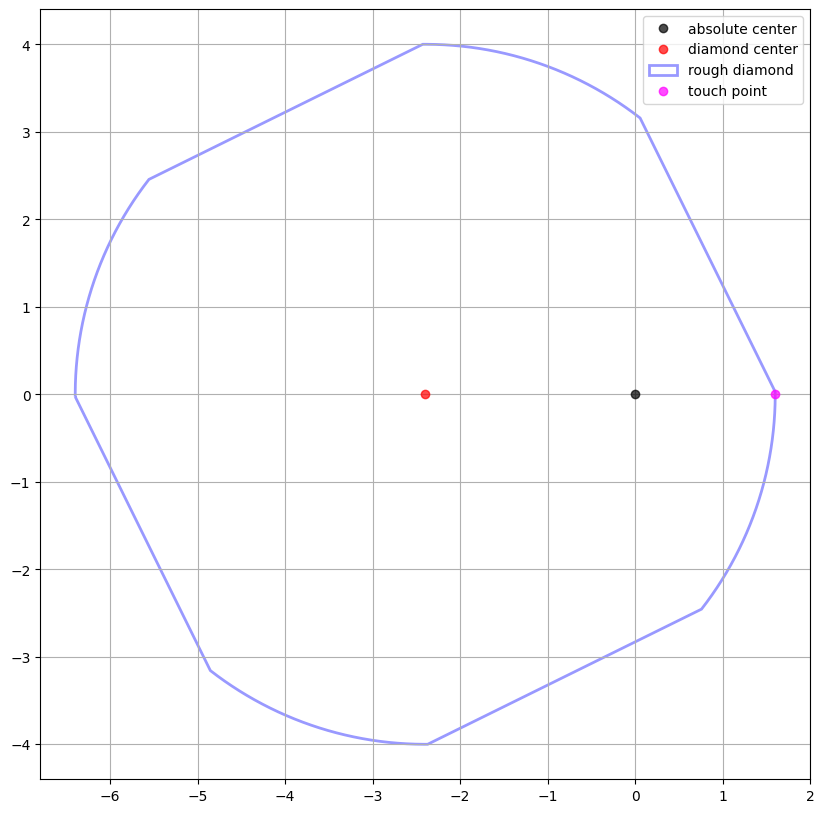

In [521]:
n = 10000

j = 0
k = 9990

angle = atan2(rtrcptss[j][k].y, rtrcptss[j][k].x)
if angle <= 2*pi:
    angle += 2*pi

xstep = (k/n+j)*delta*6

xval = r+R-affinity.rotate(rtrcptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True).x-xstep

plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7, label="absolute center")
plot_points(Point(xval, 0.0), color=(1,0,0), alpha=0.7, label="diamond center")
# plot_points(Point(r+R, 0.0), color=(1,0,0), alpha=0.7)
trace = []
GetTrace(j, k, trace)
array_trace = []
for i in range(n):
    array_trace.append([trace[i].x, trace[i].y])

trace_hull_ind = ConvexHull(array_trace)
trace_hull = []
for i in range(len(trace_hull_ind.vertices)):
    trace_hull.append(Point(array_trace[trace_hull_ind.vertices[i]][0], array_trace[trace_hull_ind.vertices[i]][1]))

ring = LinearRing(trace_hull)
print(Polygon(trace_hull).area)
plot_line(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(ring, -angle, origin=Point(0.0,0.0), use_radians=True)), 
          add_points=False, color=(0,0,1), alpha=0.4, label="rough diamond")
# plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(tangplgs[j], -angle, origin=Point(0.0,0.0), use_radians=True)), 
#             color=(0,1,0), markersize=0.5, label="bruting trace")
plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(ptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True)), 
            color=(1,0,1), alpha=0.7, label="touch point")
# plot_polygon(transform(lambda x, y, z=None: (x+(R+r-xstep), y), disk_plg), 
#              add_points=False, color=(0,0,0), alpha=0.4, label="bruting disk")

plt.rcParams["figure.figsize"] = (10.0,10.0)
plt.xlim(-16, 8)
plt.ylim(-8, 8)
plt.legend()
plt.show()

In [527]:
i = 0
for j in range(0, steps+1):
    for k in tqdm(range(0, 10000, 75)):
        fig, axs = plt.subplots(3, 1)
        fig.set_size_inches(10.0, 9.0)

        axs[0].plot(ttime[:(k+n*j)], rangles[:(k+n*j)], marker='.', color="red", markersize=0.1)
        axs[0].set_ylabel('angle of center of disk')
        axs[0].grid(True)

        axs[1].plot(ttime[:(k+n*j)], dlttang[:(k+n*j)], marker='.', linestyle="-", color="red", markersize=0.1)
        axs[1].set_ylabel('velocity of touch point')
        axs[1].grid(True)

        axs[2].plot(ttime[:(k+n*j)], area[:(k+n*j)], marker='.', linestyle="-", color="red", markersize=0.1)
        axs[2].set_xlabel('time')
        axs[2].set_ylabel('volume of removed material')
        axs[2].grid(True)

        fig.savefig('graph/' + str(i) + '.png')   # save the figure to file
        plt.close(fig)
        i += 1

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

In [ ]:
# lr = r*cos(angle-anglec)+sqrt(R**2-(r*sin(angle-anglec))**2)
# trcpts.append(Point(lr*cos(angle), lr*sin(angle)))

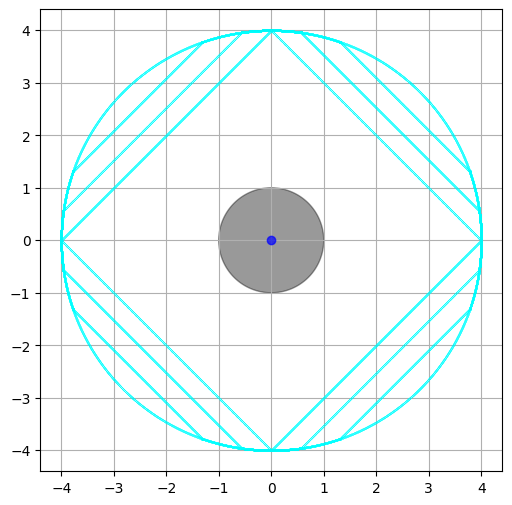

In [99]:
celpts = [opts, ptss[0], ptss[1], ptss[2]]
# cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
# oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
# circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

# plot_line(cplg, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(disk_plg, add_points=False, color=(0,0,0), alpha=0.4)

for i in range(len(celpts)):
    plot_points(celpts[i], color=(0,1,1), markersize=0.08)

plt.autoscale()
plt.show()

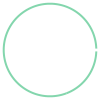

In [113]:
n = 10000

j = 0
k = 1500


angle = atan2(rtrcptss[j][k].y, rtrcptss[j][k].x)
if angle <= 2*pi:
    angle += 2*pi

xstep = (k/n+j)*delta*6

xval = r+R-affinity.rotate(rtrcptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True).x-xstep

# npts = transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(LinearRing(celpts[j]), -angle, origin=Point(0.0,0.0), use_radians=True)).intersection(
#     transform(lambda x, y, z=None: (x+(R+r-xstep), y), disk_plg))

# oopts = []

# if len(npts.coords) != 0:
#     angle1 = atan2(npts.coords[0][1], npts.coords[0][0])
#     angle2 = atan2(npts.coords[-1][1], npts.coords[-1][0])
#     if angle1 <= 0:
#         angle1 += 2*pi
#     if angle2 <= 0:
#         angle2 += 2*pi

#     for l in range(n):
#         pt = transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(opts[l], -angle, origin=Point(0.0,0.0), use_radians=True))
#         init_angle = atan2(pt.y, pt.x)
#         if (angle1 <= init_angle and init_angle <= angle2) or (angle1 >= init_angle and init_angle <= angle2):
#             lr = (r-xval)*cos(init_angle)+sqrt(R**2-((r-xval)*sin(init_angle))**2)
#             oopts.append(Point(lr*cos(init_angle), lr*sin(init_angle)))
#         else:
#             pt = transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(celpts[j][l], -angle, origin=Point(0.0,0.0), use_radians=True))
#             oopts.append(Point(pt.x, pt.y))
# else:
#     for l in range(n):
#         pt = transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(celpts[j][l], -angle, origin=Point(0.0,0.0), use_radians=True))
#         oopts.append(Point(pt.x, pt.y))

# poly1 = transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(oplg, -angle, origin=Point(0.0,0.0), use_radians=True))
# poly2 = transform(lambda x, y, z=None: (x+(R+r-xstep), y), disk_plg)
# df = difference(poly1, poly2)
# df

plot_points(Point(0.0, 0.0), color=(0,0,0), alpha=0.7, label="absolute center")
plot_points(Point(xval, 0.0), color=(1,0,0), alpha=0.7, label="diamond center")
# plot_points(Point(r+R, 0.0), color=(1,0,0), alpha=0.7)
# plot_line(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(oplg, -angle, origin=Point(0.0,0.0), use_radians=True)), 
#         add_points=False, color=(0,0,1), alpha=0.4, label="original diamond")
plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(tangplgs[j], -angle, origin=Point(0.0,0.0), use_radians=True)), 
            color=(0,1,0), markersize=0.5, label="bruting trace")
# plot_points(oopts, 
#             color=(0,1,1), markersize=0.5, label="bruting trace")
plot_points(transform(lambda x, y, z=None: (x+(xval), y), affinity.rotate(ptss[j][k], -angle, origin=Point(0.0,0.0), use_radians=True)), 
            color=(1,0,1), alpha=0.7, label="touch point")
plot_polygon(transform(lambda x, y, z=None: (x+(R+r-xstep), y), disk_plg), 
            add_points=False, color=(0,0,0), alpha=0.4, label="bruting disk")

plt.rcParams["figure.figsize"] = (10.0,10.0)
# plt.xlim(-16, 8)
# plt.ylim(-8, 8)
plt.legend()
plt.show()